In [1]:
%%bash
cd data
subsets="$(tail -n +2 clusters.csv | awk -F , '{print $2}' | sort -u)"
echo "$subsets" | awk '{print "Subset"$1}' > subsets.txt
for x in $subsets; do
	mkdir -p "subsets/Subset$x"
	grep ",$x"'$' clusters.csv | awk -F , '{print $1}' > "subsets/Subset$x/names_rna.txt"
	# RNA and ATAC barcodes are the same for joint quantifications
	cp "subsets/Subset$x/names_rna.txt" "subsets/Subset$x/names_atac.txt"
done
rm clusters.csv

In [3]:
!head data/subsets.txt

Subset1
Subset10
Subset11
Subset2
Subset3
Subset4
Subset5
Subset6
Subset7
Subset8


In [12]:
!head -n 4 data/subsets/Subset1/names_rna.txt

AAACCAACATCGTTCT-1
AAACCGGCACTTCATC-1
AAAGCAAGTCACAGCG-1
AAAGCAAGTTTGGGCG-1


In [13]:
!head -n 4 data/subsets/Subset1/names_atac.txt

AAACCAACATCGTTCT-1
AAACCGGCACTTCATC-1
AAAGCAAGTCACAGCG-1
AAAGCAAGTTTGGGCG-1


In [15]:
!head -n 18 data/motifs.motif

>dKhGCGTGh	AHR_MOUSE.H11MO.0.B	3.3193649999999995
0.262728374765856	0.1227600511842322	0.362725638699551	0.25178593535036087
0.07633328991810645	0.08258130543118362	0.22593295481662123	0.6151524498340887
0.14450570038747923	0.28392173880411337	0.13815442099009081	0.4334181398183167
0.023935814057894068	0.016203821748029118	0.9253278681170539	0.03453249607702277
0.007919544273173793	0.953597675415874	0.017308392078009837	0.021174388232942286
0.02956192959210962	0.012890110758086997	0.9474192747166682	0.010128684933135217
0.007919544273173797	0.029561929592109615	0.012337825593096645	0.9501807005416201
0.007919544273173793	0.007919544273173793	0.9762413671804787	0.007919544273173793
0.27886589130660366	0.4285328543459993	0.10955683916661985	0.18304441518077724
>hnnGGWWnddWWGGdbWh	AIRE_MOUSE.H11MO.0.C	5.55011
0.38551919443239085	0.2604245534178759	0.1353299124033618	0.21872633974637148
0.18745267949274294	0.18745267949274294	0.14575446582123766	0.4793401751932764
0.14575446582123777	0.145

In [16]:
%%bash
dictys_helper genome_homer.sh hg38 data/genome

In [17]:
%%bash
ls -h1s data/genome | head

total 4.4G
4.0K annotations
 12K chrom.sizes
3.1G genome.fa
4.0K hg38
3.2M hg38.aug


 42M hg38.basic.annotation
673M hg38.full.annotation
164K hg38.miRNA
505M hg38.repeats


In [18]:
%%bash
dictys_helper gene_gtf.sh data/gene.gtf data/gene.bed

In [19]:
!head data/gene.bed

chr1	3143476	3144545	4933401J01Rik	.	+
chr1	3172239	3172348	Gm26206	.	+
chr1	3276124	3741721	Xkr4	.	-
chr1	3322980	3323459	Gm18956	.	+
chr1	3435954	3438772	Gm37180	.	-
chr1	3445779	3448011	Gm37363	.	-
chr1	3535200	3537508	Gm37686	.	-
chr1	3536810	3583776	Gm1992	.	+
chr1	3582674	3584730	Gm37329	.	-
chr1	3602018	3602943	Gm7341	.	+


In [22]:
%%bash
mkdir makefiles
cd makefiles
dictys_helper makefile_template.sh common.mk config.mk env_none.mk static.mk

In [23]:
!dictys_helper makefile_update.py makefiles/config.mk '{"ENVMODE": "none", "NTH": "4", "DEVICE": "cuda:0", "GENOME_MACS2": "hs", "JOINT": "1"}'

In [24]:
!cat makefiles/config.mk

# Lingfei Wang, 2022. All rights reserved.
#This file contains parameters for whole run and individual steps to be edited for your dataset
#This file should be edited to configure the run
#This file should NOT be directly used for any run with `makefile -f` 

############################################################
# Run environment settings
############################################################
#Which environment to use, corresponding to env_$(ENVMODE).mk file
ENVMODE=none
#Maximum number of CPU threads for each job
#This is only nominated and passed through to other softwares without any guarantee.
NTH=4
#Device name for pyro/pytorch
#Note: cuda devices other than cuda:0 could be incompatible with singularity environment
DEVICE=cuda:0

############################################################
# Dataset settings
############################################################

#Genome size for Macs2, accept shortcuts like mm & hs
GENOME_MACS2=hs
#Whether dataset is joint prof

In [2]:
!dictys_helper makefile_check.py

Joint profile: True
Found 4878 cells with RNA profile
Found 32123 genes with RNA profile
Found 4878 cells with ATAC profile
Found 529 motifs
Found 451 TFs
here is nameg_motif:
{'Pbx1', 'Mybb', 'Pebb', 'Epas1', 'Egr1', 'Myc', 'Maf', 'Foxa2', 'Egr4', 'Tfe3', 'Zic1', 'Pparg', 'Hmga2', 'Gcm1', 'Sox4', 'Batf3', 'Spi1', 'Nfyb', 'Ets1', 'Zn148', 'Ari5b', 'Batf', 'Rfx3', 'Ap2b', 'Nfia', 'Relb', 'Smca5', 'Ppara', 'Maz', 'Nr1d2', 'Ovol1', 'Nrf1', 'Gfi1b', 'Cebpb', 'Nr1d1', 'Tha11', 'Prgr', 'Foxo4', 'Msx2', 'Elk3', 'Nfe2', 'Myf5', 'Smad3', 'Prdm9', 'Klf15', 'Nfkb1', 'Lhx6', 'Hes1', 'Lhx2', 'E2f6', 'Nr5a2', 'Pbx3', 'Nr4a1', 'Thb', 'Myf6', 'Sp2', 'Spib', 'Cdx2', 'Pax6', 'Myod1', 'Po5f1', 'Runx2', 'Hnf4a', 'Pura', 'Zic3', 'Cebpz', 'Gata1', 'Rarg', 'Nr1h2', 'Nr0b1', 'Nfac2', 'Mef2c', 'Vdr', 'Sox3', 'Atoh1', 'Stat6', 'Tlx1', 'Nkx32', 'Prd16', 'Atf7', 'Usf2', 'Barx2', 'Mitf', 'Smad2', 'Nkx21', 'Irf2', 'Nr1h3', 'Rorg', 'Hxb1', 'Foxq1', 'Hnf1b', 'Snai1', 'Pdx1', 'Elf5', 'Foxa3', 'Creb1', 'Klf1', 'Zn431',

In [1]:
import os
os.environ['KMP_AFFINITY'] = ''
import numpy as np
from dictys.net import network
import matplotlib.pyplot as plt
d0=network.from_file('output/static.h5')

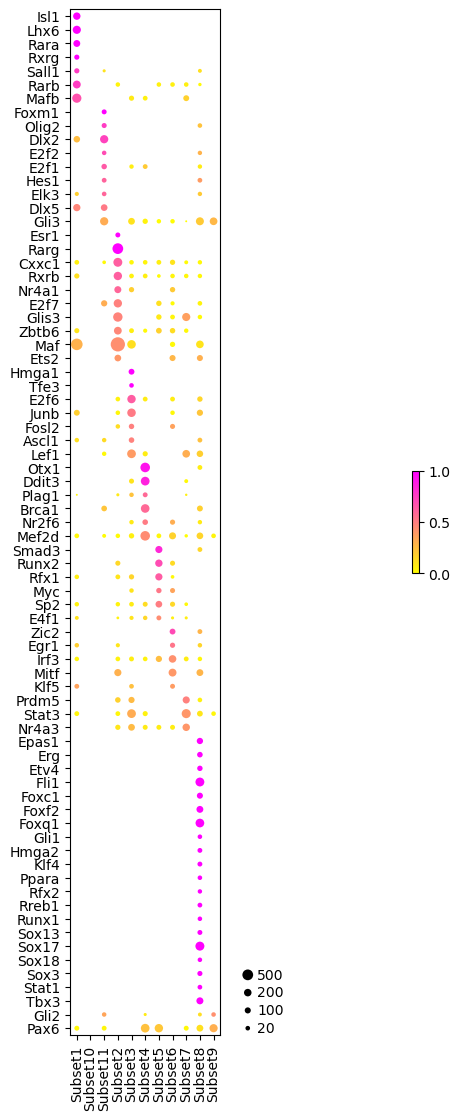

In [2]:
from dictys.plot.static import compute_spec
from dictys.plot import dotplot

#Color map of specificity
cmap='spring_r'
#Node sizes to draw legend in dot plot
node_size_deg=[20,100,200,500]
#Transformation from target count to node size
node_size_map_deg=lambda x:x*(x<=10)+(10+(x-10)*500/10/490)*(x>10)

#Find marker genes based on regulatory activity specificity
#Arguments control how many top markers to show and the cutoffs for target count, its specificity at the most abundant cell subset, and its entropy over all cell subsets
deg,deg_spec,cpm,cpm_spec,regmarker,regmarker_state=compute_spec(d0,nmax=15,vmin=10,ncut=0.3,min_entropy=0.7)
#Draw dot plot with regulatory activity and its specificity
fig,ax=dotplot(deg.loc[regmarker].iloc[::-1],deg_spec.loc[regmarker].iloc[::-1],size_transform=node_size_map_deg,sizes=np.array(node_size_deg),cmap=cmap)

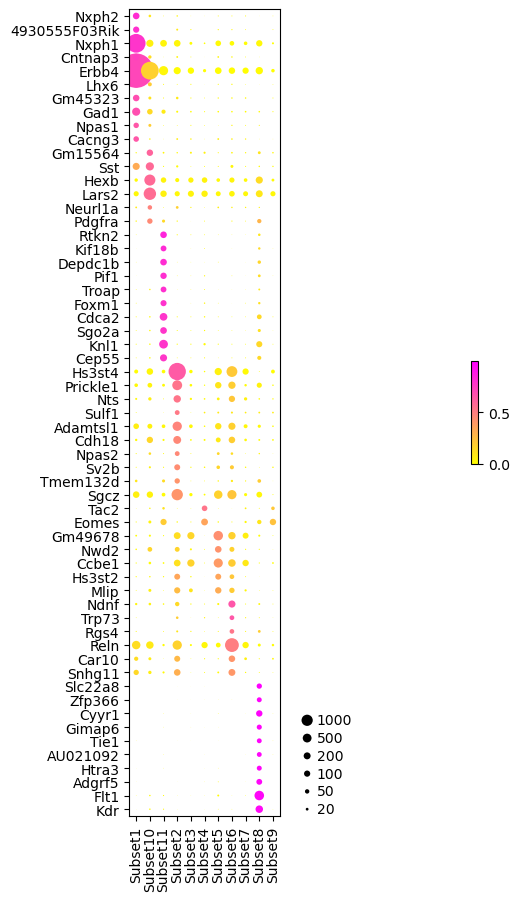

In [3]:
#Expression markers based on gene expression (by CPM) and its specificity
#Node sizes to draw legend in dot plot
node_size_cpm=[20,50,100,200,500,1000]
#Transformation from CPM to node size
node_size_map_cpm=lambda x:x/5*(x<=100)+(20+(x-100)*500/10/990)*(x>100)
#Find marker genes based on expression specificity through the option base='cpm'
deg,deg_spec,cpm,cpm_spec,expmarker,expmarker_state=compute_spec(d0,base='cpm',nmax=10,vmin=50,ncut=0.3,min_entropy=0.7)
#Draw dot plot with expression and its specificity
fig,ax=dotplot(cpm.loc[expmarker].iloc[::-1],cpm_spec.loc[expmarker].iloc[::-1],size_transform=node_size_map_cpm,sizes=np.array(node_size_cpm),cmap=cmap)

In [4]:
from dictys.plot.static import fig_diff_scatter,fig_diff_rank

In [5]:
d0.rename('s',{
	'Subset1':'GABAergic neurons','Subset10':'Oligodendrocytes','Subset11':'Astrocytes',
	'Subset2':'somatostatin-expressing interneurons','Subset3':'neuropeptide Y-expressing neurons','Subset4':'glial cells','Subset5':'excitatory cortical neurons',
	'Subset6':'reelin-expressing neurons','Subset7':'unknown','Subset8':'microglia','Subset9':'neurotensin-expressing neurons'})

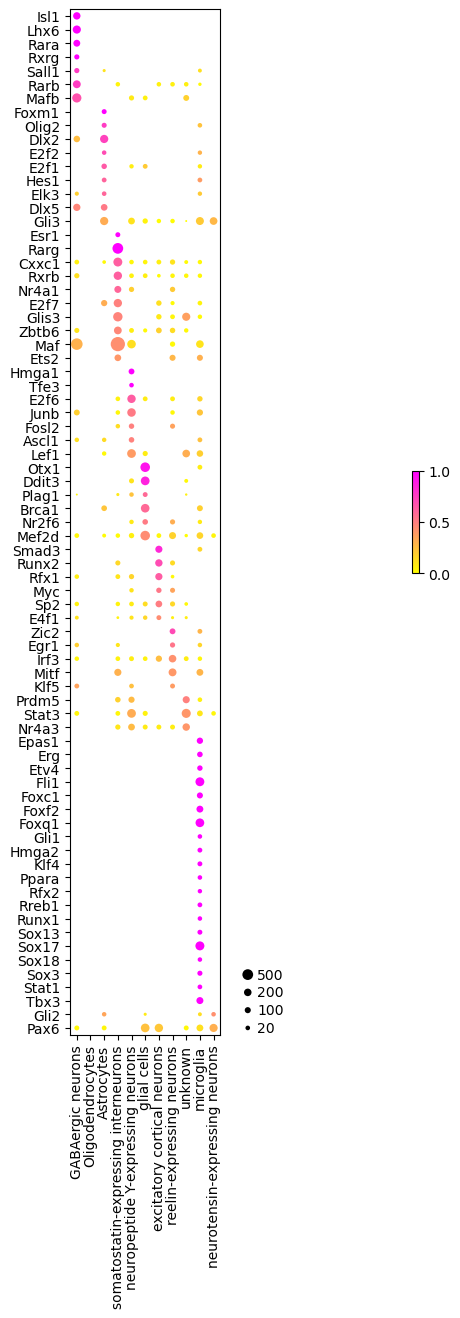

In [6]:
#Redraw of regulation marker plot
deg,deg_spec,cpm,cpm_spec,regmarker,regmarker_state=compute_spec(d0,nmax=15,vmin=10,ncut=0.3,min_entropy=0.7)
fig,ax=dotplot(deg.loc[regmarker].iloc[::-1],deg_spec.loc[regmarker].iloc[::-1],size_transform=node_size_map_deg,sizes=np.array(node_size_deg),cmap=cmap)


In [7]:
deg.head()

,GABAergic neurons,Oligodendrocytes,Astrocytes,somatostatin-expressing interneurons,neuropeptide Y-expressing neurons,glial cells,excitatory cortical neurons,reelin-expressing neurons,unknown,microglia,neurotensin-expressing neurons
Arnt,11,0,12,14,24,24,41,11,25,16,32
Arnt2,123,0,8,30,26,28,37,61,22,71,11
Ascl1,15,0,12,0,68,0,0,0,0,30,0
Atf1,1,0,12,10,9,18,13,20,5,7,10
Atf2,30,0,8,72,29,37,30,68,14,76,16


In [8]:
deg_spec.head()

,GABAergic neurons,Oligodendrocytes,Astrocytes,somatostatin-expressing interneurons,neuropeptide Y-expressing neurons,glial cells,excitatory cortical neurons,reelin-expressing neurons,unknown,microglia,neurotensin-expressing neurons
Arnt,0.048856,0.0,0.077342,0.056947,0.093881,0.105321,0.177669,0.043961,0.113182,0.070720,0.212120
Arnt2,0.297724,0.0,0.028100,0.066504,0.055427,0.066965,0.087380,0.132857,0.054280,0.171025,0.039738
Ascl1,0.122792,0.0,0.142551,0.000000,0.490262,0.000000,0.000000,0.000000,0.000000,0.244395,0.000000
Atf1,0.009013,0.0,0.156950,0.082544,0.071442,0.160296,0.114318,0.162198,0.045936,0.062786,0.134516
Atf2,0.080238,0.0,0.031050,0.176363,0.068312,0.097778,0.078286,0.163650,0.038168,0.202287,0.063868


In [9]:
cpm.head()

,GABAergic neurons,Oligodendrocytes,Astrocytes,somatostatin-expressing interneurons,neuropeptide Y-expressing neurons,glial cells,excitatory cortical neurons,reelin-expressing neurons,unknown,microglia,neurotensin-expressing neurons
0610009E02Rik,3.057940,5.781416,19.329341,4.784539,3.144877,6.791259,3.599773,4.569586,3.919136,30.481904,2.996468
0610009L18Rik,6.115879,17.344249,8.284003,2.835282,11.721813,10.564180,4.023276,6.214637,7.278395,10.287642,7.790818
0610010K14Rik,53.768770,80.939827,84.220700,25.694746,91.916166,95.832205,24.351406,57.394002,73.063891,58.296641,34.159739
0610030E20Rik,25.737658,11.562832,40.039349,20.910207,22.014136,33.956293,24.351406,21.202880,21.555247,40.007499,44.947025
0610040J01Rik,1.528970,0.000000,10.355004,3.012487,1.429489,3.521393,2.117514,1.827834,1.119753,33.530094,2.397175


In [10]:
cpm_spec.head()

,GABAergic neurons,Oligodendrocytes,Astrocytes,somatostatin-expressing interneurons,neuropeptide Y-expressing neurons,glial cells,excitatory cortical neurons,reelin-expressing neurons,unknown,microglia,neurotensin-expressing neurons
0610009E02Rik,0.034570,0.065359,0.218519,0.054089,0.035553,0.076775,0.040696,0.051659,0.044306,0.344599,0.033875
0610009L18Rik,0.066146,0.187586,0.089595,0.030665,0.126777,0.114257,0.043514,0.067214,0.078719,0.111266,0.084261
0610010K14Rik,0.079114,0.119093,0.123920,0.037807,0.135243,0.141005,0.035830,0.084448,0.107504,0.085776,0.050262
0610030E20Rik,0.084032,0.037752,0.130726,0.068271,0.071875,0.110865,0.079506,0.069226,0.070377,0.130622,0.146749
0610040J01Rik,0.025131,0.000000,0.170201,0.049515,0.023496,0.057880,0.034805,0.030043,0.018405,0.551122,0.039401


In [11]:
list(zip(regmarker,regmarker_state))

[('Isl1', 'GABAergic neurons'),
 ('Lhx6', 'GABAergic neurons'),
 ('Rara', 'GABAergic neurons'),
 ('Rxrg', 'GABAergic neurons'),
 ('Sall1', 'GABAergic neurons'),
 ('Rarb', 'GABAergic neurons'),
 ('Mafb', 'GABAergic neurons'),
 ('Foxm1', 'Astrocytes'),
 ('Olig2', 'Astrocytes'),
 ('Dlx2', 'Astrocytes'),
 ('E2f2', 'Astrocytes'),
 ('E2f1', 'Astrocytes'),
 ('Hes1', 'Astrocytes'),
 ('Elk3', 'Astrocytes'),
 ('Dlx5', 'Astrocytes'),
 ('Gli3', 'Astrocytes'),
 ('Esr1', 'somatostatin-expressing interneurons'),
 ('Rarg', 'somatostatin-expressing interneurons'),
 ('Cxxc1', 'somatostatin-expressing interneurons'),
 ('Rxrb', 'somatostatin-expressing interneurons'),
 ('Nr4a1', 'somatostatin-expressing interneurons'),
 ('E2f7', 'somatostatin-expressing interneurons'),
 ('Glis3', 'somatostatin-expressing interneurons'),
 ('Zbtb6', 'somatostatin-expressing interneurons'),
 ('Maf', 'somatostatin-expressing interneurons'),
 ('Ets2', 'somatostatin-expressing interneurons'),
 ('Hmga1', 'neuropeptide Y-expressi

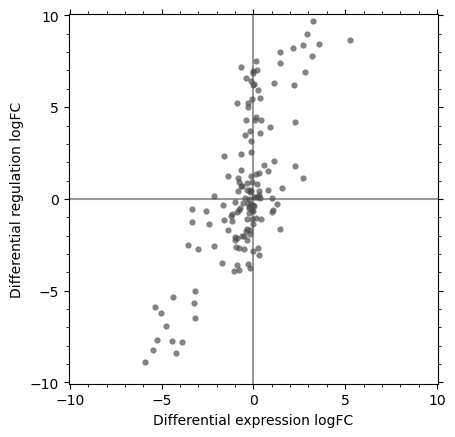

In [12]:
from dictys.plot.static import fig_diff_scatter,fig_diff_rank

#Cell type/state names to compare in (reference, alternative) format. Here it is Treg v.s. B.
states=('Astrocytes','GABAergic neurons')

fig=plt.figure()
ax=fig.add_subplot(111)
data=fig_diff_scatter(d0,ax,states)

## Differential regulation & differential expression analyses between two cell types

               In some cases adjust_text might fail, if possible update
               matplotlib to version >=3.5.0


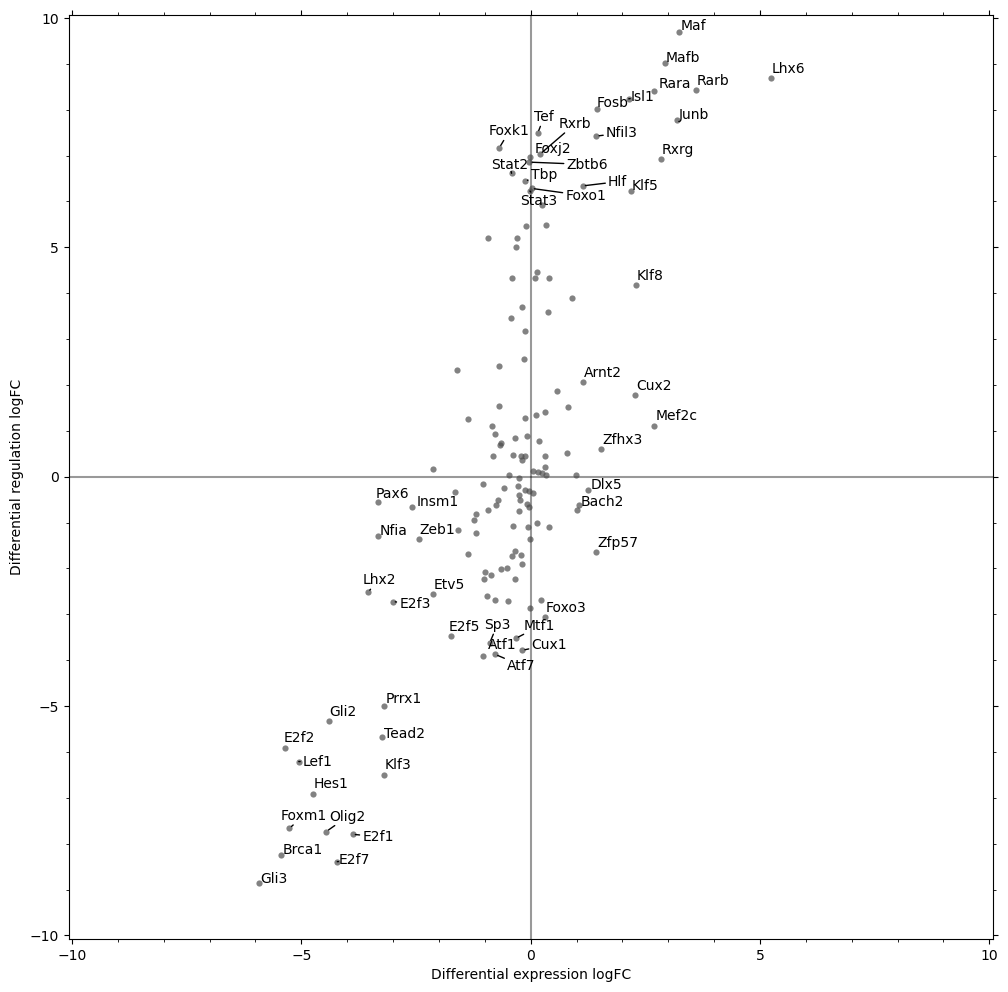

In [13]:
#Number of top genes to annotate on each side
ntop=20
#Find genes to annotate
annotate=np.partition(data.values,[ntop-1,-ntop],axis=0)
annotate=((data.values<=annotate[ntop-1])|(data.values>=annotate[-ntop])).any(axis=1)
annotate=list(data.index[annotate])
#Draw figure
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
data=fig_diff_scatter(d0,ax,states,annotate=annotate)

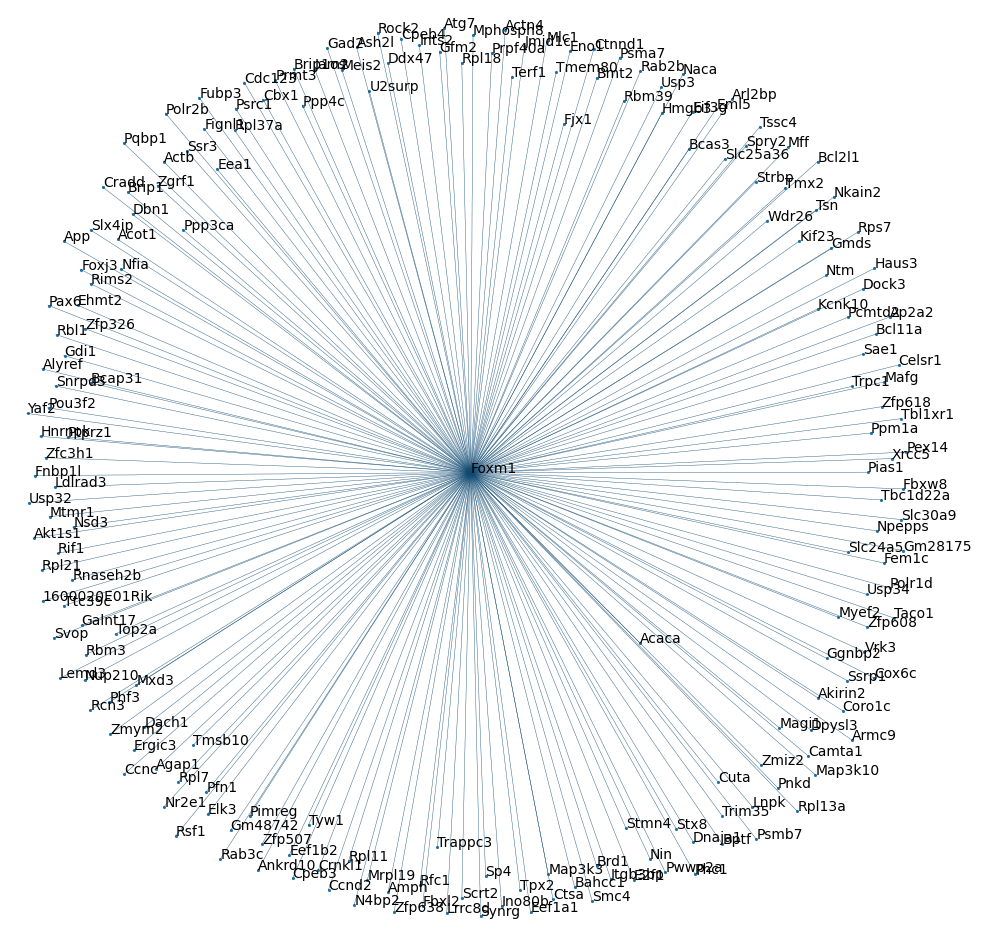

In [14]:
from dictys.plot.static import fig_subnet
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
nodes,edges=fig_subnet(d0,ax,'Astrocytes',regulators=['Foxm1'],annotate='all')

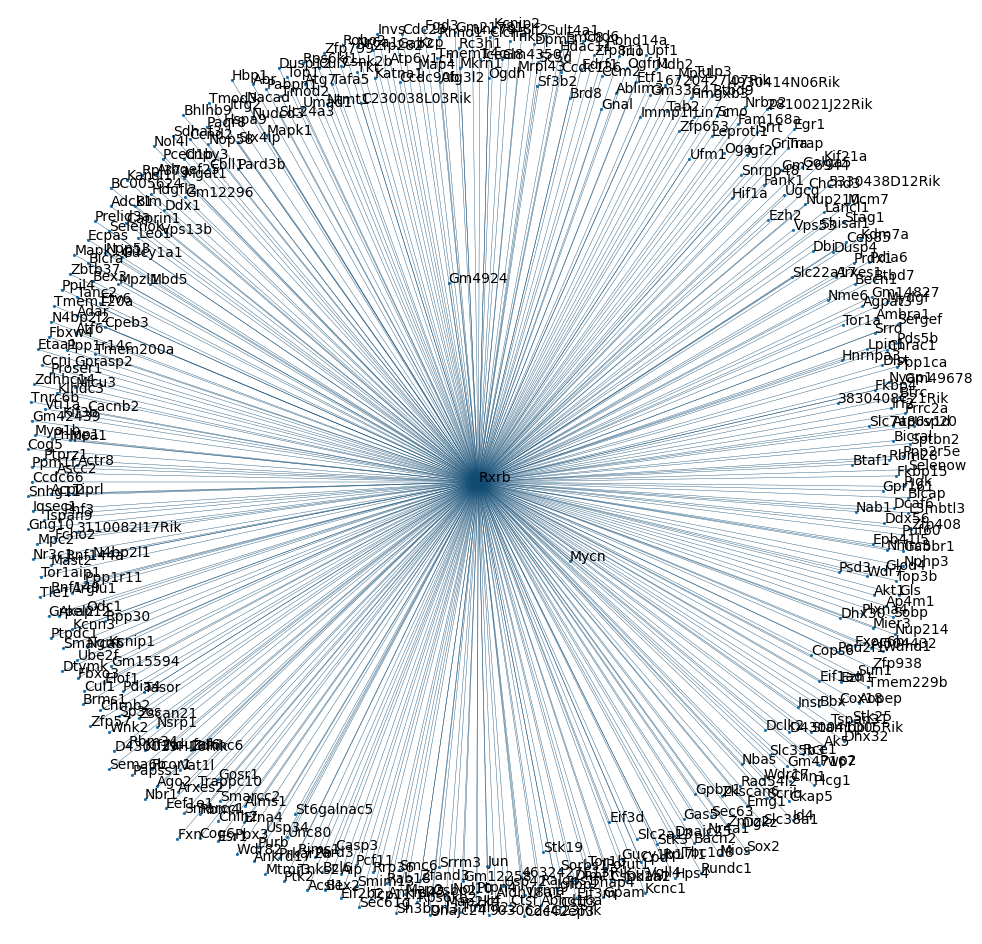

In [15]:
from dictys.plot.static import fig_subnet
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
nodes,edges=fig_subnet(d0,ax,'somatostatin-expressing interneurons',regulators=['Rxrb'],annotate='all')

In [16]:
nodes.index

Index(['2810021J22Rik', '3110082I17Rik', '3830408C21Rik', '4632427E13Rik',
       '4930414N06Rik', '5330438D12Rik', '6720427I07Rik', '9030624G23Rik',
       'AI504432', 'Abhd14a',
       ...
       'Zfp282', 'Zfp408', 'Zfp57', 'Zfp653', 'Zfp799', 'Zfp811', 'Zfp938',
       'Zkscan6', 'Zmiz2', 'Zscan21'],
      dtype='object', length=431)

In [17]:
[print(i) for i in nodes.index]

2810021J22Rik
3110082I17Rik
3830408C21Rik
4632427E13Rik
4930414N06Rik
5330438D12Rik
6720427I07Rik
9030624G23Rik
AI504432
Abhd14a
Abhd16a
Ablim3
Abr
Acp2
Acsl1
Actr8
Adar
Adck1
Afg3l2
Ago2
Agpat3
Aip
Ak5
Akap12
Akt1
Aldh18a1
Alms1
Ambra1
Ankrd17
Ankrd45
Aopep
Ap4m1
Arglu1
Arhgef25
Arxes1
Arxes2
Ascc2
Atf6
Atg7
Atp6v1c1
Atp6v1d
BC005624
Bach2
Bbx
Bcl6
Becn1
Bex2
Bex3
Bhlhb9
Bicra
Bicral
Blcap
Blm
Brd8
Brms1
Btaf1
Btbd7
Btbd9
Btrc
C230038L03Rik
Cacnb2
Caprin1
Casp3
Cbll1
Ccdc136
Ccdc66
Ccdc90b
Ccm2
Ccnd2
Ccnj
Cdc23
Cdc42ep3
Cep85
Chchd3
Chd6
Chn1
Chrac1
Chrnb2
Ckap5
Clcn5
Cnih2
Cnpy3
Cog5
Cog6
Cops6
Cox18
Cpd
Cpeb3
Csnk1a1
Csnk2b
Cstf3
Ctsf
Cul1
Cul7
D430019H16Rik
D430041D05Rik
Dbi
Dcaf6
Dclk2
Ddah2
Ddx1
Ddx56
Dgkz
Dhx30
Dhx32
Dimt1
Dlst
Dnajc24
Dnajc25
Dpm3
Dtymk
Dusp12
Dusp4
Ecpas
Edrf1
Eef1e1
Efna4
Egr1
Eif1ad
Eif2b2
Eif3d
Eif3m
Elof1
Emc8
Emg1
Epb41l5
Esr1
Etaa1
Etf1
Etv6
Exoc6b
Ezh1
Ezh2
Fam168a
Fank1
Fbxo3
Fbxw4
Fcho2
Fgd3
Fkbp15
Fkbp4
Fxn
Gab2
Gabbr1
Gas5
Glod4
Gls
Gm12258
Gm12296


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,